In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#reading the cash_request file
#cash_request = pd.read_csv("/content/extract - cash request - data analyst.csv")
cash_request = pd.read_parquet("/content/cleaned_requests.parquet", engine="pyarrow")
#fees = pd.read_csv("/content/extract - fees - data analyst - .csv")
fees = pd.read_parquet("/content/cleaned_fees.parquet", engine="pyarrow")
cash_request.info()
fees.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     21867 non-null  Int64              
 6   moderated_at                15912 non-null  datetime64[ns, UTC]
 7   deleted_account_id          2104 non-null   Int64              
 8   reimbursement_date          3050 non-null   datetime64[ns, UTC]
 9   cash_request_received_date  16289 non-null  datetime64[ns, UTC]
 10  money_back_date             12040 non-null  datetime64[ns,

In [40]:
merged_df = pd.merge(left = cash_request, right= fees, left_on= "id", right_on="cash_request_id", how = "left")
merged_df.sort_values(by="id_x")
#merged_df.info()

#check duplicates
duplicates = merged_df[merged_df.duplicated(subset=["id_x"], keep=False)]
duplicates.head()
#duplicated ids for cash requests due to different incidents


,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_y,category,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment
141,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00:00,23328,2020-07-01 16:44:53.070844+00:00,<NA>,NaT,2020-07-03 00:00:00+00:00,...,cancelled,None,5.0,Postpone Cash Request 6098,2020-08-13 10:58:39.634220+00:00,2020-10-13 14:25:16.660127+00:00,NaT,2020-08-03 22:00:00+00:00,NaT,after
142,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00:00,23328,2020-07-01 16:44:53.070844+00:00,<NA>,NaT,2020-07-03 00:00:00+00:00,...,cancelled,None,5.0,Postpone Cash Request 6098,2020-08-13 10:58:52.603153+00:00,2020-10-13 14:25:16.661371+00:00,NaT,2020-08-03 22:00:00+00:00,NaT,after
143,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00:00,23328,2020-07-01 16:44:53.070844+00:00,<NA>,NaT,2020-07-03 00:00:00+00:00,...,cancelled,None,5.0,Postpone Cash Request 6098,2020-08-13 11:00:39.879521+00:00,2020-10-13 14:25:16.662449+00:00,NaT,2020-08-03 22:00:00+00:00,NaT,after
144,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00:00,23328,2020-07-01 16:44:53.070844+00:00,<NA>,NaT,2020-07-03 00:00:00+00:00,...,cancelled,None,5.0,Postpone Cash Request 6098,2020-08-19 16:30:48.607923+00:00,2020-10-13 14:25:16.913770+00:00,NaT,2020-08-03 22:00:00+00:00,NaT,after
145,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00:00,23328,2020-07-01 16:44:53.070844+00:00,<NA>,NaT,2020-07-03 00:00:00+00:00,...,cancelled,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-09-10 22:32:51.726321+00:00,2020-12-15 17:07:43.211171+00:00,NaT,NaT,NaT,after


In [41]:
#merged_df.to_csv("merged_data_ironhack_payment")
#renaming columns
#merged_df = merged_df.rename(columns={"amount" : "amount_CR", "status_x" : "status_CR", "status_y" : "status_fees", "total_amount" : "amount_fees", "created_at_x" : "created_at_CR", "id_x" : "id_CR"})
#print(merged_df.shape)
#merged_df.head()

In [42]:
#merged_df.info()

In [43]:
#CR status money sent
cash_request["status"].value_counts()
money_back = cash_request[cash_request["reimbursement_date"].notna()]
money_back

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804,2019-12-11 16:47:42.405646+00:00,<NA>,2020-01-09 19:05:21.596363+00:00,NaT,NaT,regular,NaT,None,NaT,NaT
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00:00,231,2019-12-11 14:24:22.897988+00:00,<NA>,2020-01-09 19:50:12.347780+00:00,NaT,NaT,regular,NaT,None,NaT,NaT
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191,2019-12-11 09:46:59.777728+00:00,<NA>,2020-01-09 19:13:35.825041+00:00,NaT,NaT,regular,NaT,None,NaT,NaT
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00:00,761,2019-12-18 14:26:18.128407+00:00,<NA>,2020-01-09 19:16:10.879606+00:00,NaT,NaT,regular,NaT,None,NaT,NaT
7,654,100.0,rejected,2020-02-10 01:11:53.808270+00:00,2020-02-10 11:53:32.104131+00:00,<NA>,2020-02-10 09:11:21.350695+00:00,309,2020-03-11 01:11:53.807930+00:00,NaT,NaT,regular,NaT,None,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23873,14150,20.0,money_back,2020-08-31 15:44:19.811665+00:00,2020-12-18 13:16:45.283307+00:00,34031,2020-08-31 18:15:17.376318+00:00,<NA>,2020-09-17 15:44:19.786772+00:00,2020-09-02 00:00:00+00:00,2020-12-14 00:22:17.518024+00:00,instant,2020-09-07 15:44:19.786772+00:00,completed,2020-10-01 22:38:31.677414+00:00,2020-12-14 00:22:17.522122+00:00
23882,26141,50.0,money_back,2020-10-29 15:30:51.171923+00:00,2020-12-18 13:16:48.844728+00:00,95522,NaT,<NA>,2020-11-13 15:30:41.634000+00:00,2020-11-09 00:00:00+00:00,NaT,regular,2020-11-05 15:30:51.167830+00:00,None,NaT,NaT
23885,26783,100.0,money_back,2020-10-31 16:16:20.033708+00:00,2020-12-18 13:16:49.866282+00:00,<NA>,NaT,25166,2020-11-15 16:16:37.929000+00:00,2020-11-03 00:00:00+00:00,2020-11-15 19:01:47.184705+00:00,instant,2020-10-31 16:16:37.603328+00:00,None,NaT,NaT
23890,17284,100.0,money_back,2020-09-22 13:53:09.931151+00:00,2020-12-18 13:16:50.895620+00:00,46901,NaT,<NA>,2020-11-15 13:53:09.906683+00:00,2020-09-23 00:00:00+00:00,2020-12-16 19:05:24.379494+00:00,instant,2020-10-06 13:53:09.906683+00:00,completed,2020-11-25 22:43:47.904780+00:00,2020-12-16 19:05:24.383322+00:00


# Frequency of Service Usage: Understand how often users from each cohort utilize IronHack Payments' cash advance services over time.

In [44]:
cash_request["user_id"] = cash_request["user_id"].fillna(cash_request["deleted_account_id"]) #empty user ids for accounts that have been deleted or for requests that have been rejected
cash_request

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804,2019-12-11 16:47:42.405646+00:00,<NA>,2020-01-09 19:05:21.596363+00:00,NaT,NaT,regular,NaT,None,NaT,NaT
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00:00,231,2019-12-11 14:24:22.897988+00:00,<NA>,2020-01-09 19:50:12.347780+00:00,NaT,NaT,regular,NaT,None,NaT,NaT
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191,2019-12-11 09:46:59.777728+00:00,<NA>,2020-01-09 19:13:35.825041+00:00,NaT,NaT,regular,NaT,None,NaT,NaT
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00:00,761,2019-12-18 14:26:18.128407+00:00,<NA>,2020-01-09 19:16:10.879606+00:00,NaT,NaT,regular,NaT,None,NaT,NaT
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.340080+00:00,7686,2020-05-07 09:21:55.320193+00:00,<NA>,NaT,NaT,NaT,regular,NaT,None,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00:00,13681,NaT,<NA>,NaT,2020-10-13 00:00:00+00:00,2021-02-06 20:17:49.257521+00:00,instant,2020-10-12 13:54:24.352856+00:00,None,NaT,NaT
23966,25243,50.0,money_back,2020-10-27 14:41:25.734910+00:00,2020-12-18 13:15:40.843946+00:00,30367,NaT,30367,NaT,2020-10-28 00:00:00+00:00,2020-12-01 13:26:53.787672+00:00,instant,2020-10-27 14:41:57.901946+00:00,completed,2020-11-12 23:20:41.928788+00:00,2020-12-01 13:26:53.815504+00:00
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00:00,82122,NaT,<NA>,NaT,2020-10-21 00:00:00+00:00,2021-02-05 12:19:30.626289+00:00,instant,2020-10-20 07:58:14.171553+00:00,None,NaT,NaT
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00:00,64517,NaT,<NA>,NaT,2020-10-12 00:00:00+00:00,2021-02-05 13:14:19.689906+00:00,instant,2020-10-10 05:41:23.368363+00:00,None,NaT,NaT


In [45]:
#convert creat at column to datetime
cash_request["created_at"] = pd.to_datetime(cash_request["created_at"])

# group by user and take the first created date as cohort month
cash_request["cohort_month"] = cash_request.groupby("user_id")["created_at"].transform("min")
cash_request["cohort_month"] = cash_request["cohort_month"].dt.to_period("M") #transforming to period
cash_request["cohort_month"] = cash_request["cohort_month"].fillna("deleted or rejected")


# take created_date as usage_date
cash_request["usage_month"] = cash_request["created_at"].dt.to_period("M")
cash_request


C:\Users\luis\AppData\Local\Temp\ipykernel_10408\1957404387.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_request["cohort_month"] = cash_request["cohort_month"].dt.to_period("M") #transforming to period
C:\Users\luis\AppData\Local\Temp\ipykernel_10408\1957404387.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_request["usage_month"] = cash_request["created_at"].dt.to_period("M")


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort_month,usage_month
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804,2019-12-11 16:47:42.405646+00:00,<NA>,2020-01-09 19:05:21.596363+00:00,NaT,NaT,regular,NaT,None,NaT,NaT,2019-12,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00:00,231,2019-12-11 14:24:22.897988+00:00,<NA>,2020-01-09 19:50:12.347780+00:00,NaT,NaT,regular,NaT,None,NaT,NaT,2019-12,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191,2019-12-11 09:46:59.777728+00:00,<NA>,2020-01-09 19:13:35.825041+00:00,NaT,NaT,regular,NaT,None,NaT,NaT,2019-12,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00:00,761,2019-12-18 14:26:18.128407+00:00,<NA>,2020-01-09 19:16:10.879606+00:00,NaT,NaT,regular,NaT,None,NaT,NaT,2019-12,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.340080+00:00,7686,2020-05-07 09:21:55.320193+00:00,<NA>,NaT,NaT,NaT,regular,NaT,None,NaT,NaT,2020-05,2020-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00:00,13681,NaT,<NA>,NaT,2020-10-13 00:00:00+00:00,2021-02-06 20:17:49.257521+00:00,instant,2020-10-12 13:54:24.352856+00:00,None,NaT,NaT,2020-06,2020-10
23966,25243,50.0,money_back,2020-10-27 14:41:25.734910+00:00,2020-12-18 13:15:40.843946+00:00,30367,NaT,30367,NaT,2020-10-28 00:00:00+00:00,2020-12-01 13:26:53.787672+00:00,instant,2020-10-27 14:41:57.901946+00:00,completed,2020-11-12 23:20:41.928788+00:00,2020-12-01 13:26:53.815504+00:00,2020-10,2020-10
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00:00,82122,NaT,<NA>,NaT,2020-10-21 00:00:00+00:00,2021-02-05 12:19:30.626289+00:00,instant,2020-10-20 07:58:14.171553+00:00,None,NaT,NaT,2020-10,2020-10
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00:00,64517,NaT,<NA>,NaT,2020-10-12 00:00:00+00:00,2021-02-05 13:14:19.689906+00:00,instant,2020-10-10 05:41:23.368363+00:00,None,NaT,NaT,2020-10,2020-10


In [46]:
#time to reimburse
cash_request["reimbursement_date"] = pd.to_datetime(cash_request["reimbursement_date"])
cash_request["time_to_reimburse"] = cash_request["reimbursement_date"] - cash_request["created_at"]
cash_request["time_to_reimburse"] = cash_request["time_to_reimburse"].dt.days
cash_request_reimbursement = cash_request[cash_request["time_to_reimburse"].notna()]
cash_request_reimbursement.describe()


,id,amount,user_id,deleted_account_id,time_to_reimburse
count,3050.000000,3050.000000,3050.0,428.0,3050.000000
mean,12746.640984,81.192787,26798.567869,8491.378505,21.258033
std,8444.915650,28.149816,26586.140451,7839.321311,16.616425
min,5.000000,1.000000,34.0,91.0,2.000000
25%,4144.500000,50.000000,6461.0,3204.0,14.000000
50%,13673.000000,100.000000,18217.5,6334.0,16.000000
75%,18796.250000,100.000000,37704.25,11629.25,25.000000
max,27005.000000,200.000000,103719.0,29610.0,332.000000


In [47]:
#cash_request["cohort_month"] = cash_request["cohort_month"].astype(str)

statistics_per_usage_month = cash_request.groupby(["usage_month"]).agg({"amount":"sum", "id" : "count", "time_to_reimburse":"sum"})
statistics_per_usage_month = statistics_per_usage_month.rename(columns={"id" : "count_CR", "amount" : "exposure"})
statistics_per_usage_month["AVG_CR"] = statistics_per_usage_month["exposure"] / statistics_per_usage_month["count_CR"]
statistics_per_usage_month["AVG_time_to_reimburse"] = statistics_per_usage_month["time_to_reimburse"] / statistics_per_usage_month["count_CR"]

statistics_per_usage_month


,exposure,count_CR,time_to_reimburse,AVG_CR,AVG_time_to_reimburse
usage_month,,,,,
2019-11,1.0,1,0.0,1.000000,0.000000
2019-12,27297.0,289,2271.0,94.453287,7.858131
2020-01,21587.0,223,2782.0,96.802691,12.475336
2020-02,16653.0,184,1722.0,90.505435,9.358696
2020-03,23549.0,244,1104.0,96.512295,4.524590
2020-04,46093.0,473,1426.0,97.448203,3.014799
2020-05,79236.0,837,3447.0,94.666667,4.118280
2020-06,246026.0,2615,10184.0,94.082600,3.894455
2020-07,328187.0,3601,10931.0,91.137740,3.035546


In [48]:
#cash_request["money_back_date"] = pd.to_datetime(cash_request["money_back_date"])
cash_request["timo_to_get_money_back"] = cash_request["money_back_date"] - cash_request["created_at"]
cash_request["timo_to_get_money_back"] = cash_request["timo_to_get_money_back"].dt.days
cash_request.describe()


,id,amount,user_id,deleted_account_id,time_to_reimburse,timo_to_get_money_back
count,23970.000000,23970.000000,23970.0,2104.0,3050.000000,12040.000000
mean,13910.966124,82.720818,30570.545265,9658.755228,21.258033,32.703488
std,7788.117214,26.528065,27266.706244,7972.743249,16.616425,26.525342
min,3.000000,1.000000,34.0,91.0,2.000000,0.000000
25%,7427.250000,50.000000,9269.0,3767.0,14.000000,17.000000
50%,14270.500000,100.000000,21465.0,6121.5,16.000000,26.000000
75%,20607.750000,100.000000,43198.5,16345.0,25.000000,37.000000
max,27010.000000,200.000000,103719.0,30445.0,332.000000,365.000000


In [49]:
#how often users from each cohort use cash advance services?
usage_frequency = cash_request.groupby(["cohort_month", "usage_month"]) ["id"].count().reset_index()
usage_frequency = usage_frequency.rename(columns={"id" : "usage_freq"})
usage_frequency["cohort_month"] = usage_frequency["cohort_month"].astype(str) #converting date to str
usage_frequency["usage_month"] = usage_frequency["usage_month"].astype(str) #converting date to str
usage_frequency_pivot = usage_frequency.pivot(index="cohort_month", columns="usage_month", values="usage_freq")
usage_frequency_pivot

usage_month,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
cohort_month,,,,,,,,,,,,,
2019-11,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,2.0,NaN
2019-12,NaN,288.0,106.0,63.0,79.0,82.0,86.0,91.0,72.0,84.0,53.0,75.0,1.0
2020-01,NaN,NaN,117.0,24.0,17.0,35.0,31.0,29.0,31.0,22.0,22.0,25.0,1.0
2020-02,NaN,NaN,NaN,97.0,49.0,49.0,45.0,45.0,45.0,44.0,27.0,40.0,NaN
2020-03,NaN,NaN,NaN,NaN,99.0,42.0,46.0,47.0,40.0,36.0,30.0,30.0,1.0
2020-04,NaN,NaN,NaN,NaN,NaN,264.0,150.0,151.0,116.0,107.0,89.0,75.0,NaN
2020-05,NaN,NaN,NaN,NaN,NaN,NaN,478.0,318.0,274.0,232.0,180.0,174.0,4.0
2020-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1934.0,1027.0,957.0,687.0,656.0,5.0
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.0,941.0,608.0,595.0,7.0


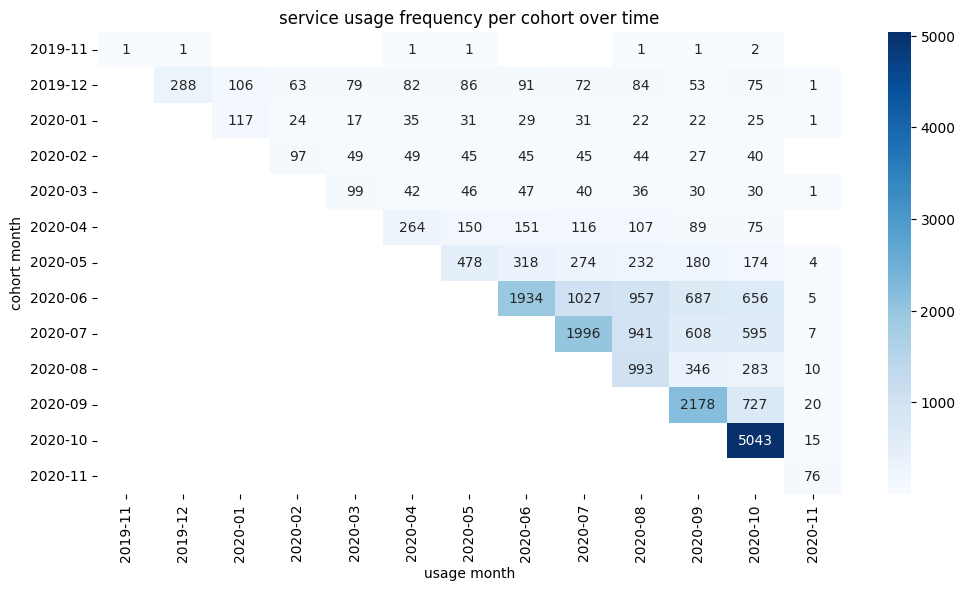

In [50]:
plt.figure(figsize=(12, 6))
sns.heatmap(usage_frequency_pivot,  annot=True, fmt='g', cmap='Blues')
plt.title("service usage frequency per cohort over time")
plt.ylabel("cohort month")
plt.xlabel("usage month")
plt.show()
#interpretation
#small user size in early cohorts --> possilby launch phase
#big increase in users from June 2020 on
#drop in use after first month --> retention curve?
#some cohorts more active in later month e.g. june 2020 vs july 2020

In [51]:
#cash_request.isnull().mean() #% of missing per column
# the last 3 columns are likewise poorly filled


In [52]:
#fees.isnull().mean()

In [53]:
fees.head()
fees["total_amount"].value_counts()

total_amount
5.0     21056
10.0        1
Name: count, dtype: int64

# Incident Rate: Determine the incident rate, specifically focusing on payment incidents, for each cohort. Identify if there are variations in incident rates among different cohorts.

In [54]:
#check type values
fees["type"].value_counts()

type
instant_payment    11095
postpone            7766
incident            2196
Name: count, dtype: int64

In [55]:
#define incidents
incidents = ["incident"]

#new boolean column for incident
fees["is_incident"] = fees["type"].isin(incidents)
fees

#calculate incidents per cash request
incidents_per_CR = fees.groupby(["cash_request_id"]).agg(total_incidents=("is_incident", "sum")).reset_index()
incidents_per_CR.value_counts()

cash_request_id  total_incidents
27010.0          0                  1
1456.0           0                  1
1503.0           0                  1
1518.0           0                  1
1554.0           0                  1
                                   ..
1631.0           0                  1
1625.0           4                  1
1602.0           0                  1
1591.0           0                  1
1566.0           1                  1
Name: count, Length: 12933, dtype: int64

In [56]:
#create incident rate per cohort

incidents_per_cohort = pd.merge(cash_request,incidents_per_CR, left_on="id", right_on="cash_request_id", how="left" )
incidents_per_cohort
incident_summary = incidents_per_cohort.groupby(["cohort_month"]).agg( total_requests=("id", "count"), total_incidents=("total_incidents", "sum")). reset_index()
incident_summary
incident_summary["incident_rate"] = incident_summary["total_incidents"] / incident_summary["total_requests"]
incident_summary

,cohort_month,total_requests,total_incidents,incident_rate
0,2019-11,8,0.0,0.000000
1,2019-12,1080,53.0,0.049074
2,2020-01,354,15.0,0.042373
3,2020-02,441,24.0,0.054422
4,2020-03,371,32.0,0.086253
5,2020-04,952,119.0,0.125000
6,2020-05,1660,234.0,0.140964
7,2020-06,5266,776.0,0.147360
8,2020-07,4147,576.0,0.138896
9,2020-08,1632,149.0,0.091299


Text(0, 0.5, 'incident rate')

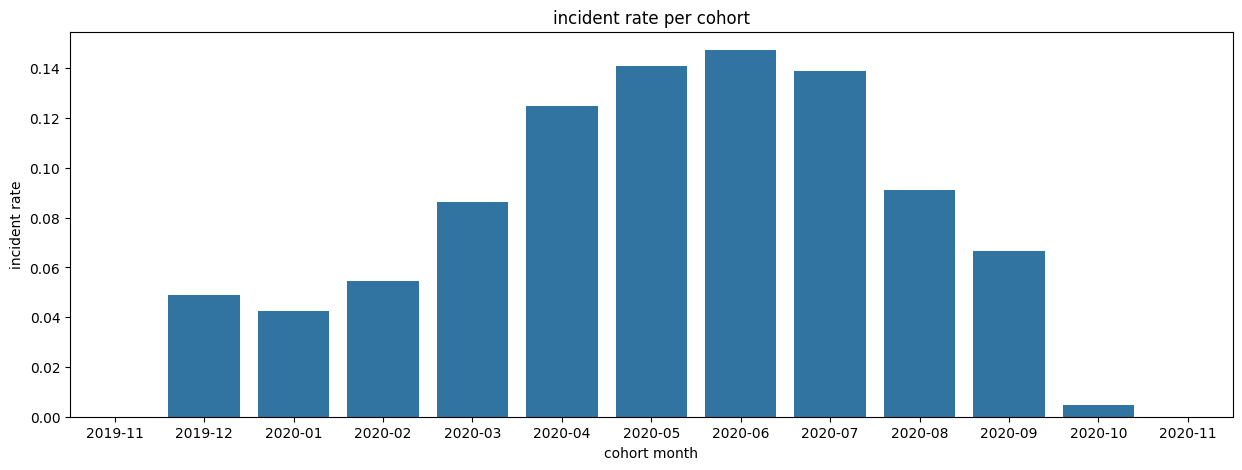

In [57]:
plt.figure(figsize = (15, 5))
sns.barplot(data=incident_summary, x="cohort_month", y = "incident_rate")
plt.title("incident rate per cohort")
plt.xlabel("cohort month")
plt.ylabel("incident rate")

#analysis
#peaks in Jun 2020
#decrease from July on >> technological improvements? better incident management?

# Revenue Generated by the Cohort: Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.

In [58]:
cash_request["created_at"] = pd.to_datetime(cash_request["created_at"])
#summing total amount by cash request in file fees because CR Ids are doubled
fees_by_cash_request = fees.groupby(["cash_request_id"]).agg({"total_amount" : "sum"}).reset_index()
fees_by_cash_request
#merging CR with summed fees by CR id
merged_df_2 = pd.merge(cash_request, fees_by_cash_request, left_on="id", right_on="cash_request_id", how="left")
merged_df_2

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,send_at,recovery_status,reco_creation,reco_last_update,cohort_month,usage_month,time_to_reimburse,timo_to_get_money_back,cash_request_id,total_amount
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804,2019-12-11 16:47:42.405646+00:00,<NA>,2020-01-09 19:05:21.596363+00:00,NaT,...,NaT,None,NaT,NaT,2019-12,2019-12,29.0,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00:00,231,2019-12-11 14:24:22.897988+00:00,<NA>,2020-01-09 19:50:12.347780+00:00,NaT,...,NaT,None,NaT,NaT,2019-12,2019-12,30.0,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191,2019-12-11 09:46:59.777728+00:00,<NA>,2020-01-09 19:13:35.825041+00:00,NaT,...,NaT,None,NaT,NaT,2019-12,2019-12,29.0,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00:00,761,2019-12-18 14:26:18.128407+00:00,<NA>,2020-01-09 19:16:10.879606+00:00,NaT,...,NaT,None,NaT,NaT,2019-12,2019-12,29.0,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.340080+00:00,7686,2020-05-07 09:21:55.320193+00:00,<NA>,NaT,NaT,...,NaT,None,NaT,NaT,2020-05,2020-05,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00:00,13681,NaT,<NA>,NaT,2020-10-13 00:00:00+00:00,...,2020-10-12 13:54:24.352856+00:00,None,NaT,NaT,2020-06,2020-10,NaN,117.0,20616.0,5.0
23966,25243,50.0,money_back,2020-10-27 14:41:25.734910+00:00,2020-12-18 13:15:40.843946+00:00,30367,NaT,30367,NaT,2020-10-28 00:00:00+00:00,...,2020-10-27 14:41:57.901946+00:00,completed,2020-11-12 23:20:41.928788+00:00,2020-12-01 13:26:53.815504+00:00,2020-10,2020-10,NaN,34.0,25243.0,10.0
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00:00,82122,NaT,<NA>,NaT,2020-10-21 00:00:00+00:00,...,2020-10-20 07:58:14.171553+00:00,None,NaT,NaT,2020-10,2020-10,NaN,108.0,22357.0,10.0
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00:00,64517,NaT,<NA>,NaT,2020-10-12 00:00:00+00:00,...,2020-10-10 05:41:23.368363+00:00,None,NaT,NaT,2020-10,2020-10,NaN,118.0,20256.0,10.0


In [59]:
cohort_revenue = merged_df_2.groupby(["cohort_month", "usage_month"]).agg({"total_amount" : "sum"}).reset_index()
cohort_revenue

,cohort_month,usage_month,total_amount
0,2019-11,2019-11,0.0
1,2019-11,2019-12,0.0
2,2019-11,2020-04,0.0
3,2019-11,2020-05,25.0
4,2019-11,2020-08,10.0
...,...,...,...
78,2020-09,2020-10,4235.0
79,2020-09,2020-11,75.0
80,2020-10,2020-10,29445.0
81,2020-10,2020-11,55.0


In [60]:
cohort_revenue["cohort_month"] = cohort_revenue["cohort_month"].astype(str) #converting date to str so that we can use the column as index and column name later
cohort_revenue["usage_month"] = cohort_revenue["usage_month"].astype(str) #converting date to str
revenue_pivot = cohort_revenue.pivot(index = "cohort_month", columns="usage_month", values= "total_amount")
revenue_pivot

usage_month,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
cohort_month,,,,,,,,,,,,,
2019-11,0.0,0.0,NaN,NaN,NaN,0.0,25.0,NaN,NaN,10.0,5.0,10.0,NaN
2019-12,NaN,0.0,0.0,0.0,0.0,0.0,60.0,250.0,180.0,560.0,180.0,325.0,0.0
2020-01,NaN,NaN,0.0,0.0,0.0,0.0,40.0,45.0,160.0,145.0,125.0,140.0,0.0
2020-02,NaN,NaN,NaN,0.0,0.0,0.0,80.0,130.0,135.0,285.0,115.0,220.0,NaN
2020-03,NaN,NaN,NaN,NaN,0.0,0.0,10.0,225.0,90.0,185.0,155.0,200.0,5.0
2020-04,NaN,NaN,NaN,NaN,NaN,5.0,180.0,585.0,405.0,640.0,405.0,345.0,NaN
2020-05,NaN,NaN,NaN,NaN,NaN,NaN,890.0,1120.0,935.0,1135.0,930.0,905.0,15.0
2020-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6370.0,2615.0,5825.0,4160.0,3510.0,15.0
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5875.0,4925.0,3300.0,3055.0,20.0


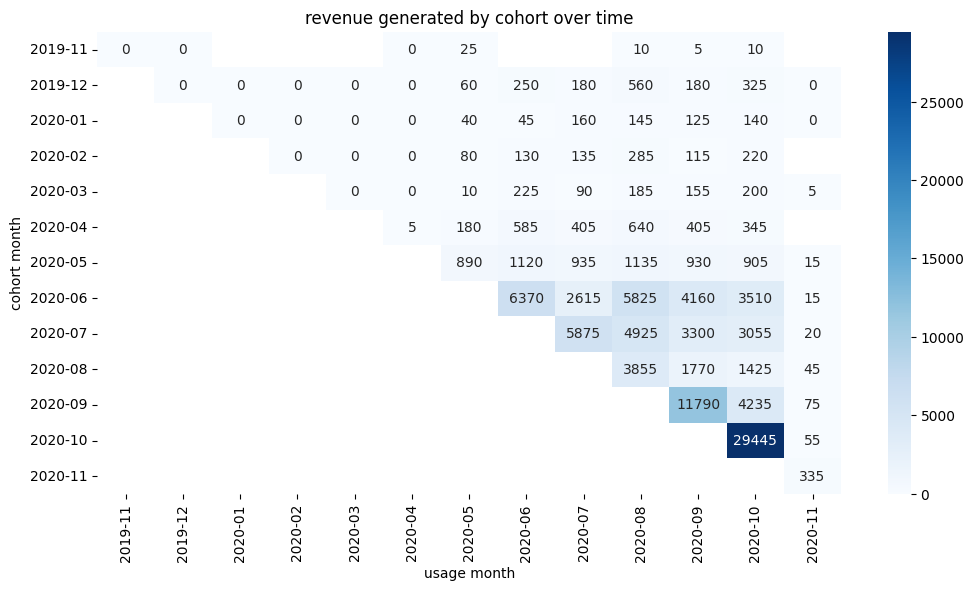

In [61]:
plt.figure(figsize=(12, 6))
sns.heatmap(revenue_pivot,  annot=True, fmt='g', cmap='Blues')
plt.title("revenue generated by cohort over time")
plt.ylabel("cohort month")
plt.xlabel("usage month")
plt.show()
#analysis
#early cohorts generated no revenue, indicating initial phase / launch
#big spike in revenue in june, july >> product update? successful marketing campagne?
#later cohorts in sept, oct show spikes again >> changed user behavior? product updates, pricing updates?
#continuous revenue decrease over time >> first month has the highest reveneu followed by decreasing usage>> one-time usage? low retention?

In [62]:
fees["reason"].value_counts() #Filled only if the CR was manually reviewed and rejected. That's the rejection's reason displayed in-app.

reason
rejected direct debit                 1599
month delay on payment - 9/2020        283
month delay on payment - 8/2020        203
month delay on payment - 10/2020       102
Postpone Cash Request 12225             34
                                      ... 
Instant Payment Cash Request 26088       1
Instant Payment Cash Request 20832       1
Instant Payment Cash Request 13056       1
Instant Payment Cash Request 19487       1
Instant Payment Cash Request 26772       1
Name: count, Length: 15145, dtype: int64

In [63]:
#ideas for other KPIs: revenue on risk >> revenue with an incident
#exposure at risk >> borrowed money
#time to repayment
cash_request["cohort_month"] = cash_request["cohort_month"].astype(str)

plt.figure(figsize=(30,10))
exposure_per_cohort = cash_request.groupby(["cohort_month"]).agg({"amount":"sum", })
exposure_per_cohort

cash_request_NaT = cash_request[cash_request["cohort_month"] == "NaT"]
cash_request_NaT



,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort_month,usage_month,time_to_reimburse,timo_to_get_money_back


<Figure size 3000x1000 with 0 Axes>